# Notebook for training earthquake detection and phase picking model with DiTingTools

In [1]:
# workaround imoort
import sys
sys.path.append('../../')
import os
import matplotlib.pyplot as plt
import numpy as np

# Load example configuration

In [2]:
import yaml
cfgs = yaml.load(open('../demo_data/det_pick_cfgs/det_pick_example.yaml','r'),Loader=yaml.Loader)
os.environ['CUDA_VISIBLE_DEVICES'] = cfgs['Training']['GPU_ID']

In [3]:
print(cfgs)

{'Training': {'Datasets': {'DiTing': {'name': 'DiTing', 'train_csv_path': '../demo_data/dl_dataset_demos/DiTing50Hz_demo/DiTing_demo.train.csv', 'train_hdf5_path': '../demo_data/dl_dataset_demos/DiTing50Hz_demo/DiTing330km_part_{}.hdf5', 'has_validation': True, 'val_csv_path': '../demo_data/dl_dataset_demos/DiTing50Hz_demo/DiTing_demo.val.csv', 'val_hdf5_path': '../demo_data/dl_dataset_demos/DiTing50Hz_demo/DiTing330km_part_{}.hdf5', 'has_parts': True, 'part_num': 28, 'combo_num': 3, 'length': 6144, 'n_channels': 3, 'n_classes': 3, 'sample_weight': 0.5}, 'STEAD': {'name': 'STEAD', 'train_csv_path': '../demo_data/dl_dataset_demos/STEAD_demo/STEAD_demo.train.csv', 'train_hdf5_path': '../demo_data/dl_dataset_demos/STEAD_demo/STEAD_demo.hdf5', 'has_validation': True, 'val_csv_path': '../demo_data/dl_dataset_demos/STEAD_demo/STEAD_demo.val.csv', 'val_hdf5_path': '../demo_data/dl_dataset_demos/STEAD_demo/STEAD_demo.hdf5', 'has_parts': False, 'combo_num': 3, 'length': 6144, 'n_channels': 3, '

# Visualize dataset

In [4]:
from dtt.dev.det_pick.tfDataset import get_EqDetPhasePicking_training_dataset_with_Negtive_sampling

In [5]:
train_set, val_set = get_EqDetPhasePicking_training_dataset_with_Negtive_sampling(cfgs)

2022-04-19 11:52:33.266835: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-04-19 11:52:38.099973: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:41:00.0 name: Tesla V100S-PCIE-32GB computeCapability: 7.0
coreClock: 1.597GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 1.03TiB/s
2022-04-19 11:52:38.100654: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-04-19 11:52:38.103515: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-04-19 11:52:38.106112: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-04-19 11:52:38.107150: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so

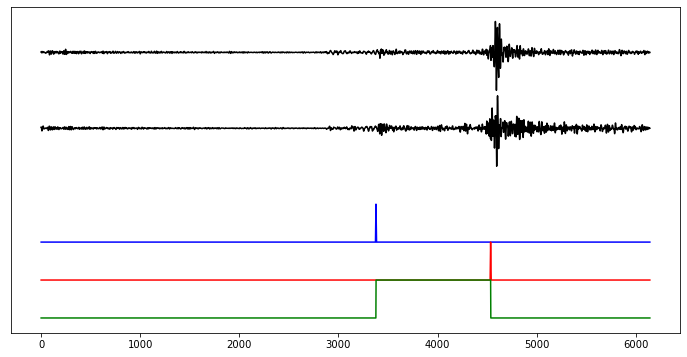

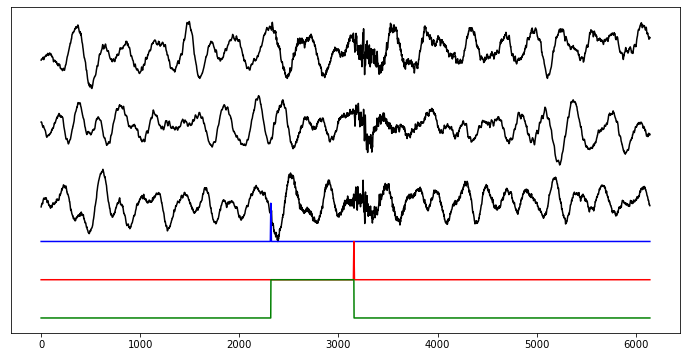

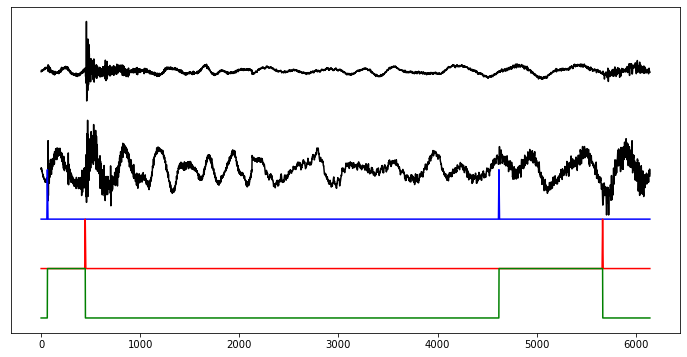

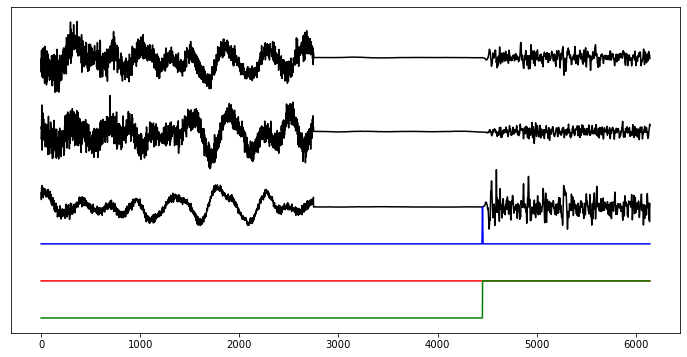

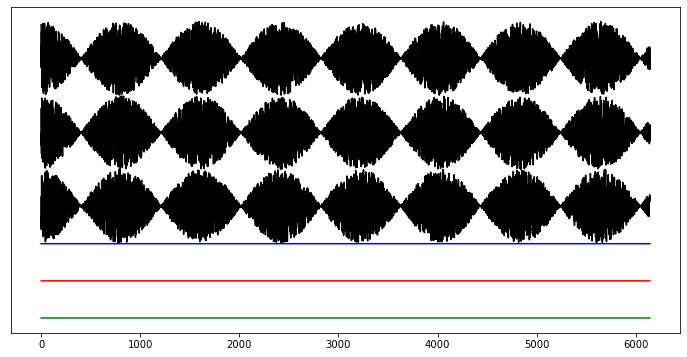

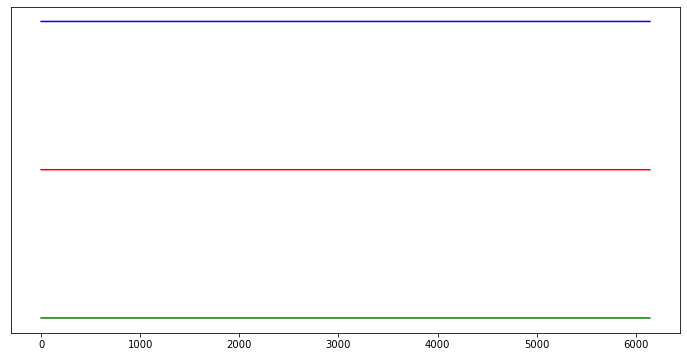

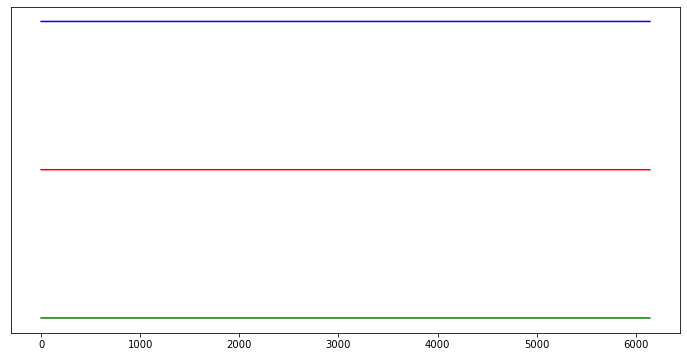

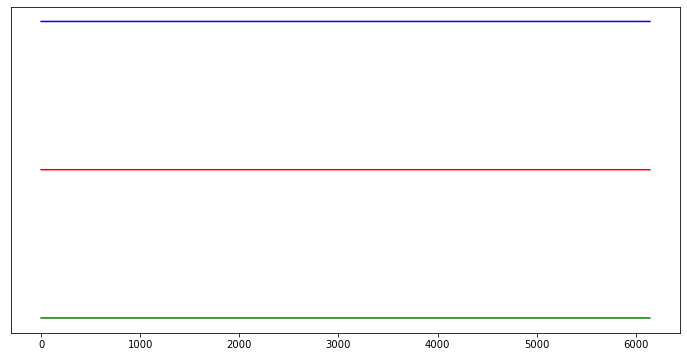

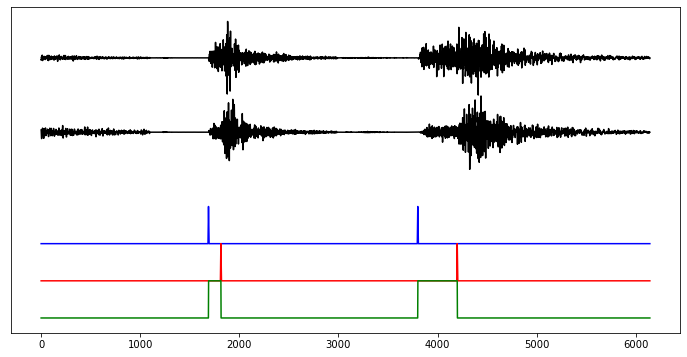

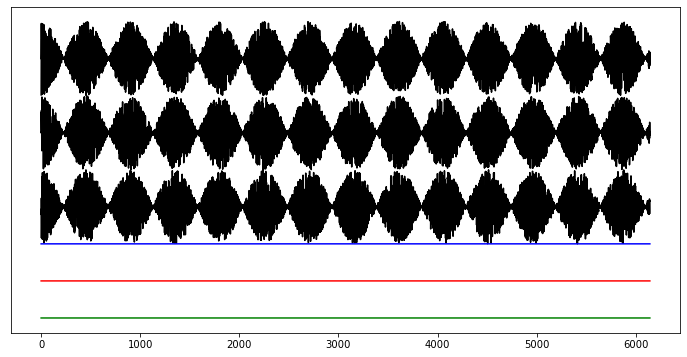

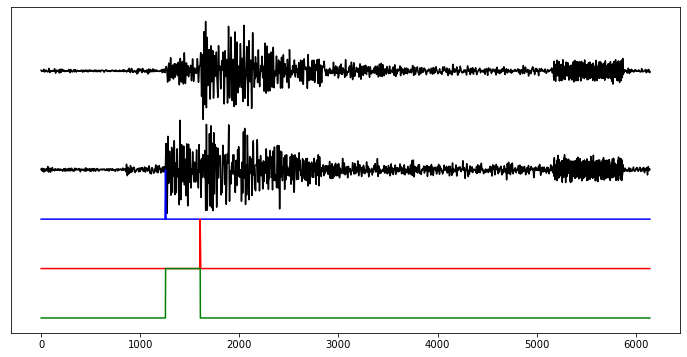

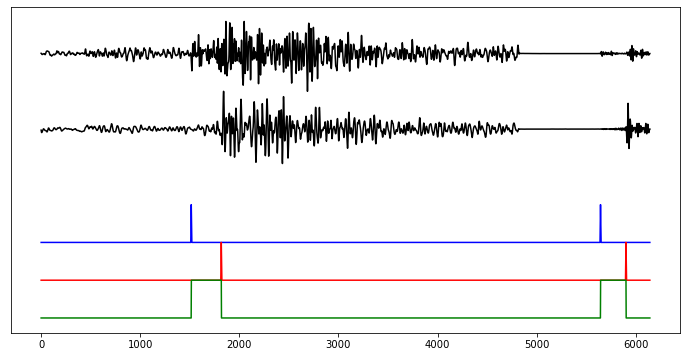

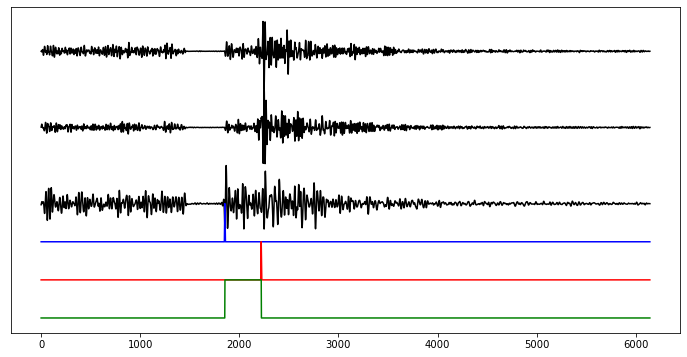

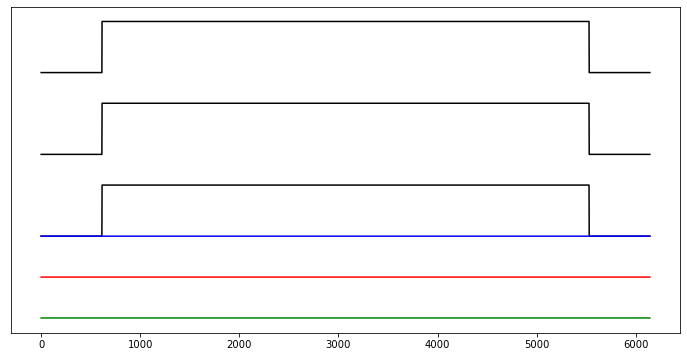

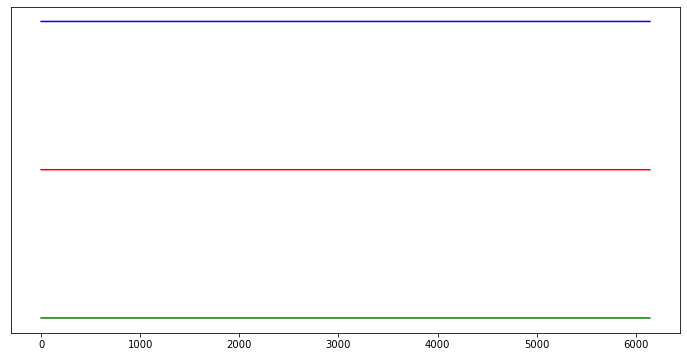

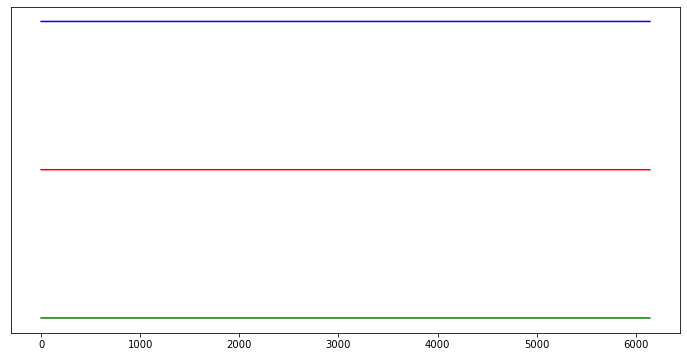

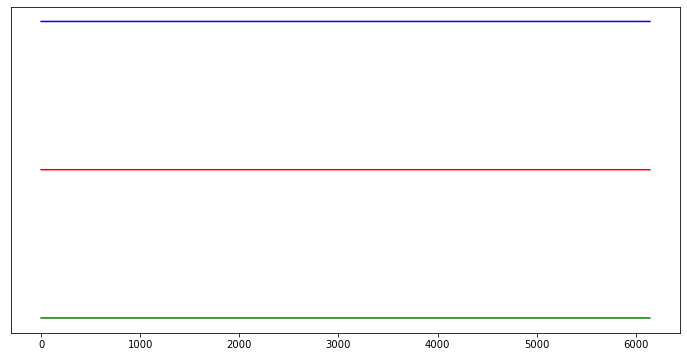

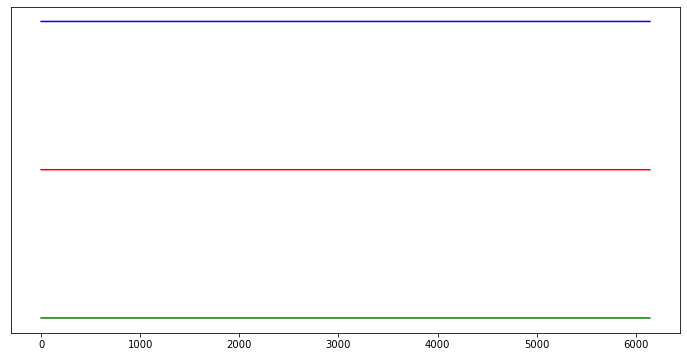

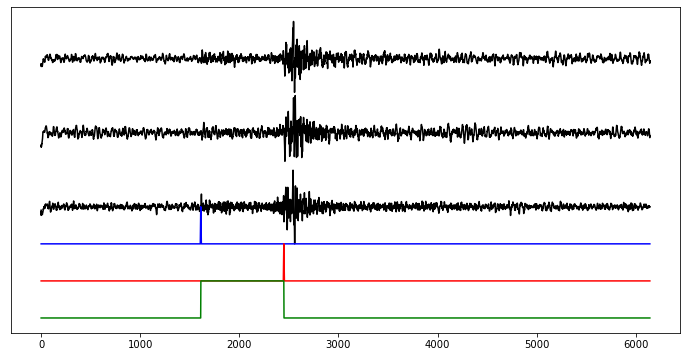

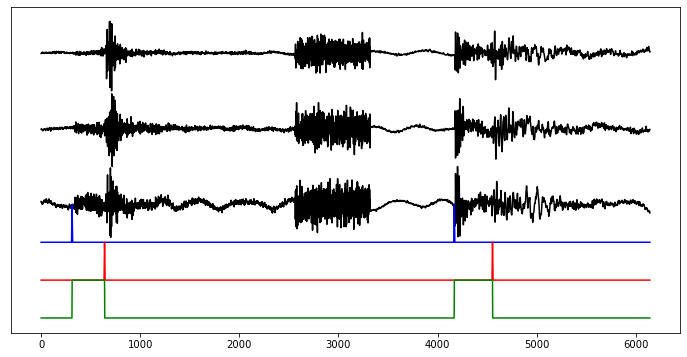

In [6]:
batch_size = 20
for output_data in train_set.batch(batch_size).take(1):
    for batch_dx in range(batch_size):
        plt.figure(figsize=(12,6))
        if np.max(np.abs(output_data[0].numpy()[batch_dx,:,0])) == 0:
            pass
        else:
            plt.plot(output_data[0].numpy()[batch_dx,:,0]/np.max(np.abs(output_data[0].numpy()[batch_dx,:,0])),color='k')
        if np.max(np.abs(output_data[0].numpy()[batch_dx,:,1])) == 0:
            pass
        else:
            plt.plot(output_data[0].numpy()[batch_dx,:,1]/np.max(np.abs(output_data[0].numpy()[batch_dx,:,1])) + 2,color='k')
        if np.max(np.abs(output_data[0].numpy()[batch_dx,:,2])) == 0:
            pass
        else:
            plt.plot(output_data[0].numpy()[batch_dx,:,2]/np.max(np.abs(output_data[0].numpy()[batch_dx,:,2])) + 4,color='k')

        plt.plot(output_data[1]['C0D0'][batch_dx,:,0] - 1,color='b',label='P')
        plt.plot(output_data[1]['C1D0'][batch_dx,:,0] - 2,color='r',label='S')
        plt.plot(output_data[1]['C2D0'][batch_dx,:,0] - 3,color='g',label='EQ')
        plt.yticks([])
        plt.show()
        plt.close()

# Start training

In [7]:
from dtt.dev.det_pick.train import train

In [8]:
train(cfgs)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 6144, 3)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 6144, 8)      80          input[0][0]                      
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 6144, 8)      200         conv1d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 6144, 8)      0           conv1d_1[0][0]                   
______________________________________________________________________________________________

Done Creating Dataset
Done Creating Generator


2022-04-19 11:53:08.115757: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2022-04-19 11:53:09.375259: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


100/100 [==============================] - 25s 254ms/step - loss: 7.7017 - stack_1_p_loss: 0.6766 - stack_2_p_loss: 0.6351 - stack_3_p_loss: 0.6176 - final_p_loss: 0.6055 - stack_1_s_loss: 0.7847 - stack_2_s_loss: 0.6725 - stack_3_s_loss: 0.5447 - final_s_loss: 0.4052 - stack_1_d_loss: 0.6949 - stack_2_d_loss: 0.7301 - stack_3_d_loss: 0.7088 - final_d_loss: 0.6259 - val_loss: 5.9421 - val_stack_1_p_loss: 0.6608 - val_stack_2_p_loss: 0.4579 - val_stack_3_p_loss: 0.4551 - val_final_p_loss: 0.3972 - val_stack_1_s_loss: 0.6280 - val_stack_2_s_loss: 0.5431 - val_stack_3_s_loss: 0.3123 - val_final_s_loss: 0.1598 - val_stack_1_d_loss: 0.6865 - val_stack_2_d_loss: 0.6356 - val_stack_3_d_loss: 0.5007 - val_final_d_loss: 0.5051 - lr: 3.0000e-05
